In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
df = pd.read_csv('../data/icu_ibd_all_table.csv')

In [32]:
df.columns

Index(['hadm_id', 'subject_id', 'intime', 'outtime', 'los', 'mortality',
       'gender', 'age', 'weight', 'bmi', 'heart_rate', 'systolic_pressure',
       'diastolic_pressure', 'respiratory_rate', 'temperature',
       'white_blood_cell', 'hematocrit', 'red_blood_cell', 'rdw', 'platelet',
       'mcv', 'mch', 'hemoglobin', 'CRP', 'race', 'language', 'marital_status',
       'insurance', 'die_in_icu', 'uc_only', 'cd_only', 'uc_cd'],
      dtype='object')

In [85]:
df

,hadm_id,subject_id,intime,outtime,los,mortality,gender,age,weight,bmi,...,CRP,race,language,marital_status,insurance,die_in_icu,uc_only,cd_only,uc_cd,type
0,20004577,14583219,2164-07-15 04:11:42,2164-07-15 21:30:20,0.721273,0,0,30,NaN,NaN,...,NaN,WHITE,ENGLISH,MARRIED,Other,0,1,0,0,uc_only
1,20007037,16147352,2129-11-14 14:43:18,2129-11-15 16:22:06,1.068610,0,1,58,153.00,NaN,...,NaN,WHITE,ENGLISH,DIVORCED,Other,0,1,0,0,uc_only
2,20030062,14887253,2127-06-05 14:10:01,2127-06-07 14:50:49,2.028330,1,0,57,NaN,NaN,...,NaN,WHITE,ENGLISH,DIVORCED,Other,0,0,1,0,cd_only
3,20033189,14685940,2127-07-31 14:46:00,2127-08-01 20:58:34,1.258730,1,0,76,147.30,28.8,...,NaN,WHITE,ENGLISH,MARRIED,Other,0,1,0,0,uc_only
4,20033924,13158454,2196-04-28 11:28:47,2196-05-01 14:22:54,3.120910,1,0,64,184.08,33.7,...,NaN,BLACK/AFRICAN AMERICAN,ENGLISH,SINGLE,Other,0,0,1,0,cd_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,29968343,13050725,2167-09-23 10:56:17,2167-09-26 03:24:17,2.686110,1,0,61,162.00,27.8,...,NaN,WHITE,ENGLISH,SINGLE,Medicare,1,0,1,0,cd_only
1157,29978132,12626863,2172-11-25 18:52:00,2172-12-03 05:10:40,7.429630,1,1,75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,uc_only
1158,29984287,12251785,2179-01-10 18:40:00,2179-01-11 16:02:09,0.890382,0,0,55,112.70,23.2,...,NaN,WHITE,ENGLISH,SINGLE,Medicare,1,0,1,0,cd_only
1159,29988959,12845930,2118-11-08 12:07:00,2118-11-09 13:18:33,1.049690,1,1,73,NaN,NaN,...,NaN,WHITE,ENGLISH,MARRIED,Medicare,1,1,0,0,uc_only


In [65]:
df['type'] = df[['uc_only', 'cd_only', 'uc_cd']].apply(lambda s: s.idxmax(), axis=1)

In [66]:
pd.pivot_table(df, values='subject_id', index=['type'], 
               columns=['gender'], aggfunc=lambda series: series.unique().shape[0])

gender,0,1
type,,
cd_only,174,146
uc_cd,20,14
uc_only,162,167


In [73]:
pd.pivot_table(df, values='subject_id', index=['type'], 
               columns=['insurance'], aggfunc=lambda series: series.unique().shape[0])

insurance,Medicaid,Medicare,Other
type,,,
cd_only,18,131,160
uc_cd,3,13,18
uc_only,17,144,161


In [71]:
174+146+20+14+162+167, df['subject_id'].unique().shape[0]

(683, 683)

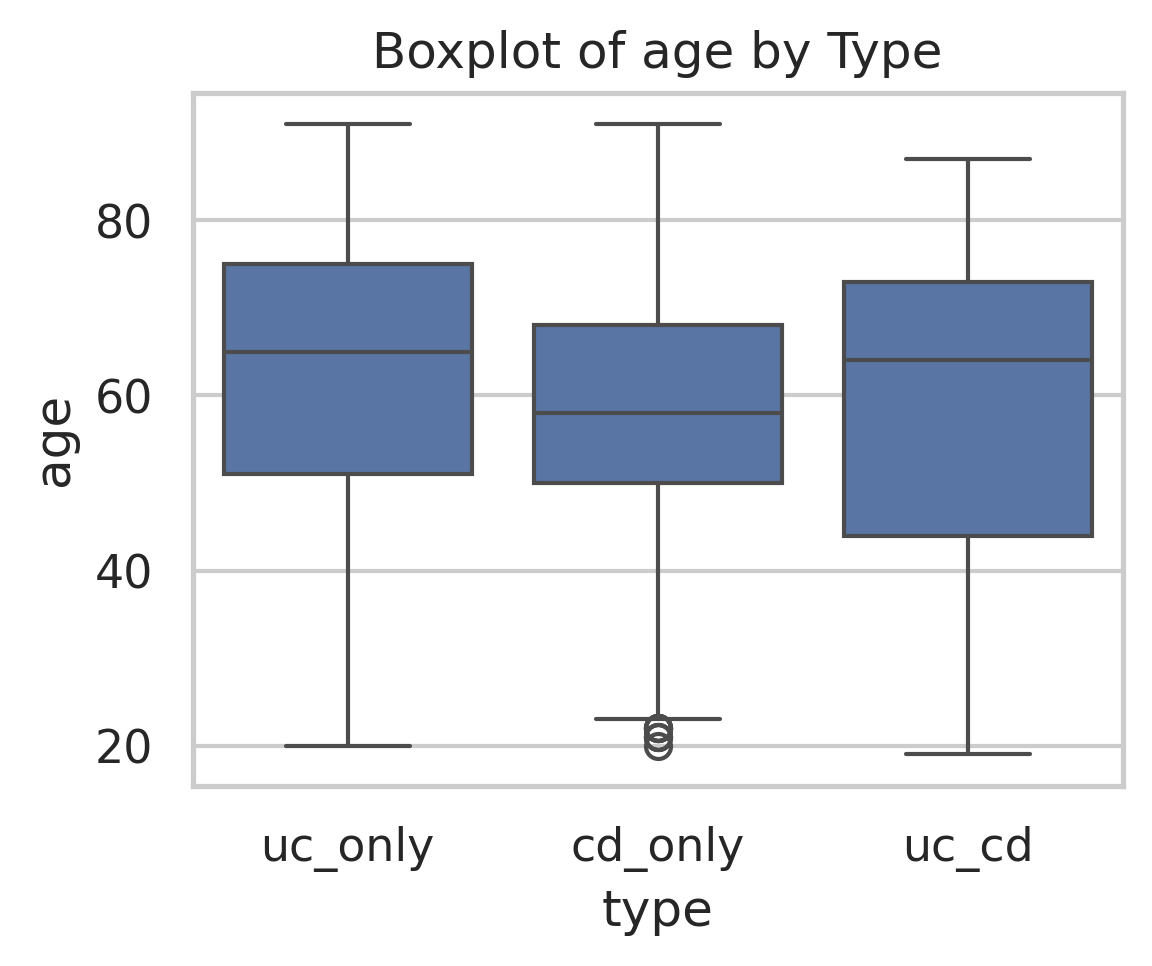

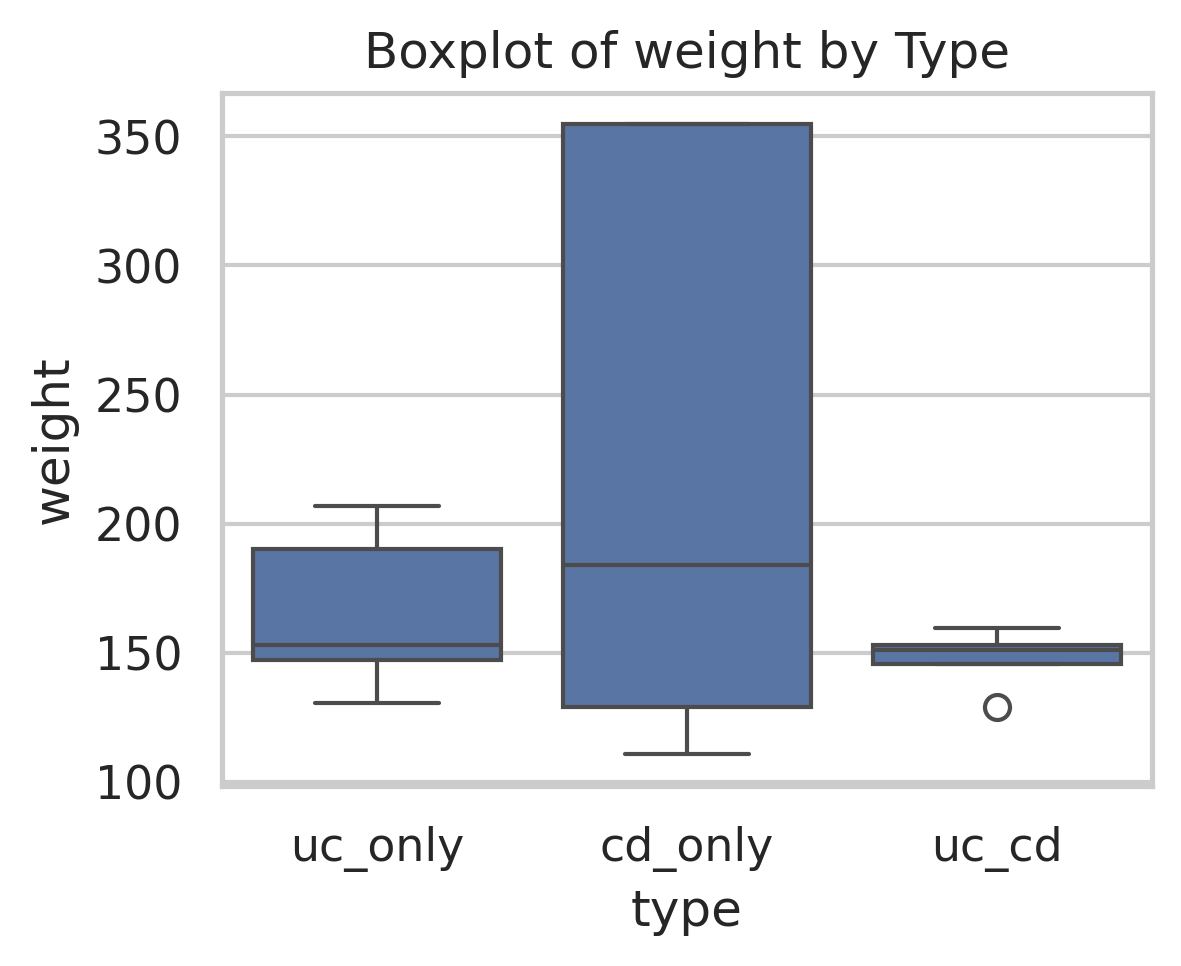

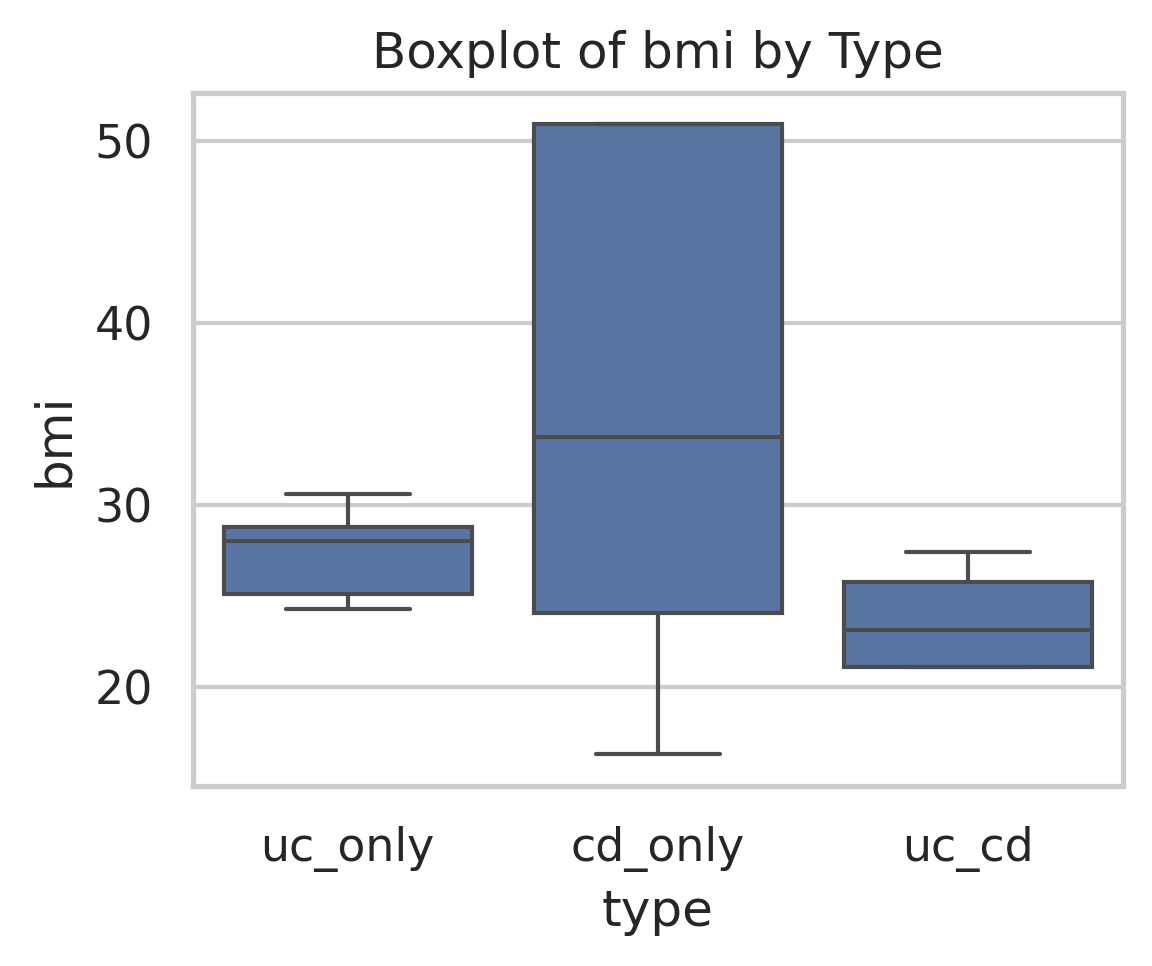

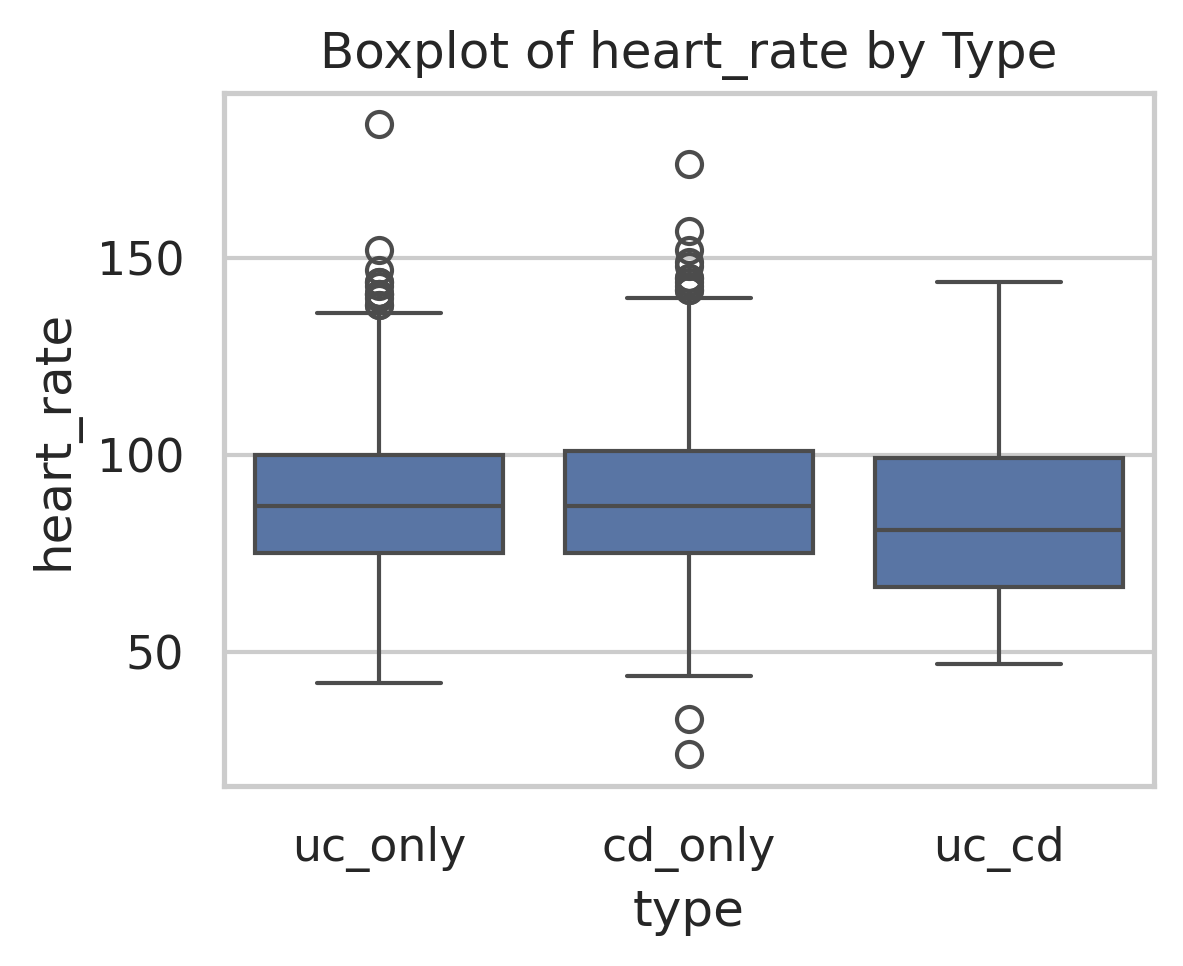

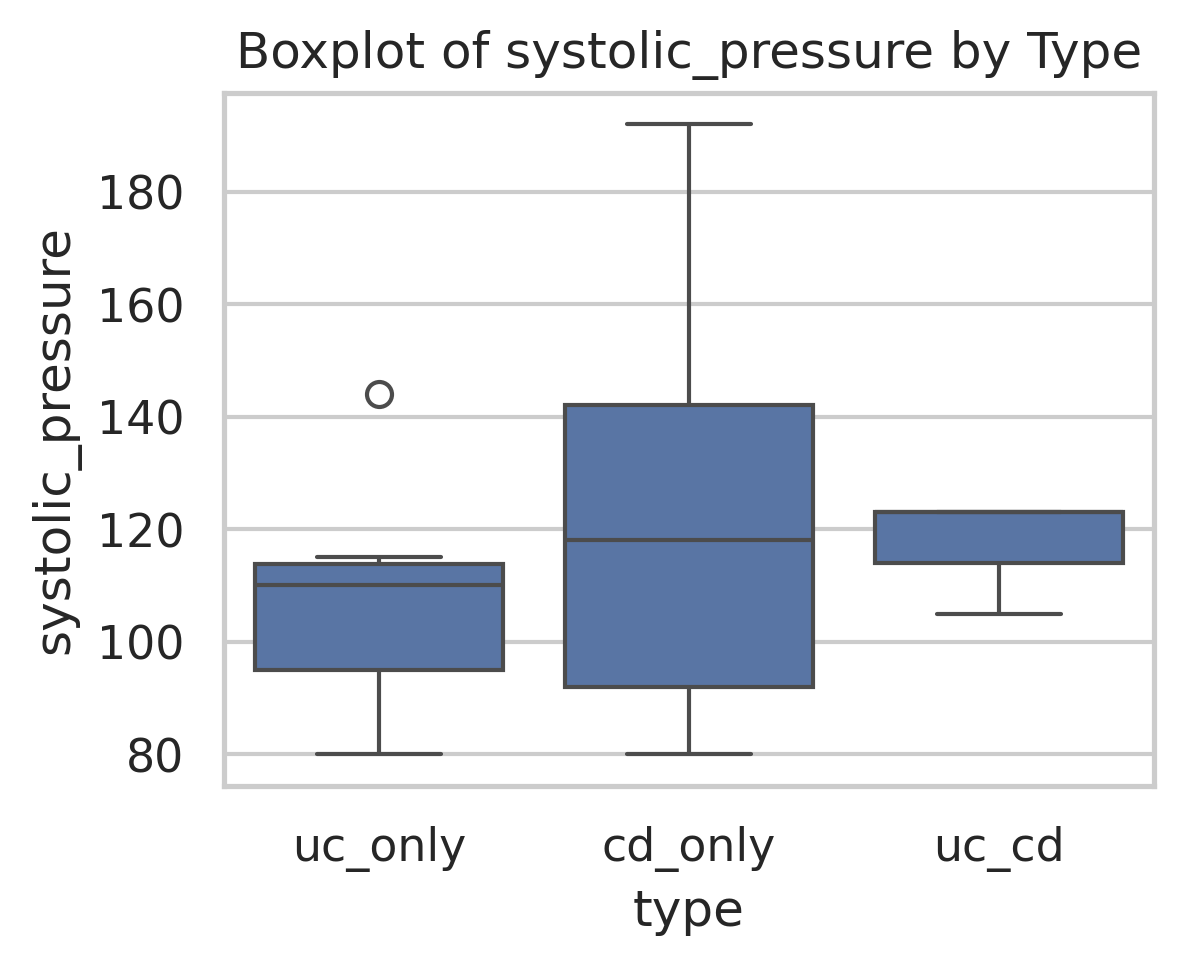

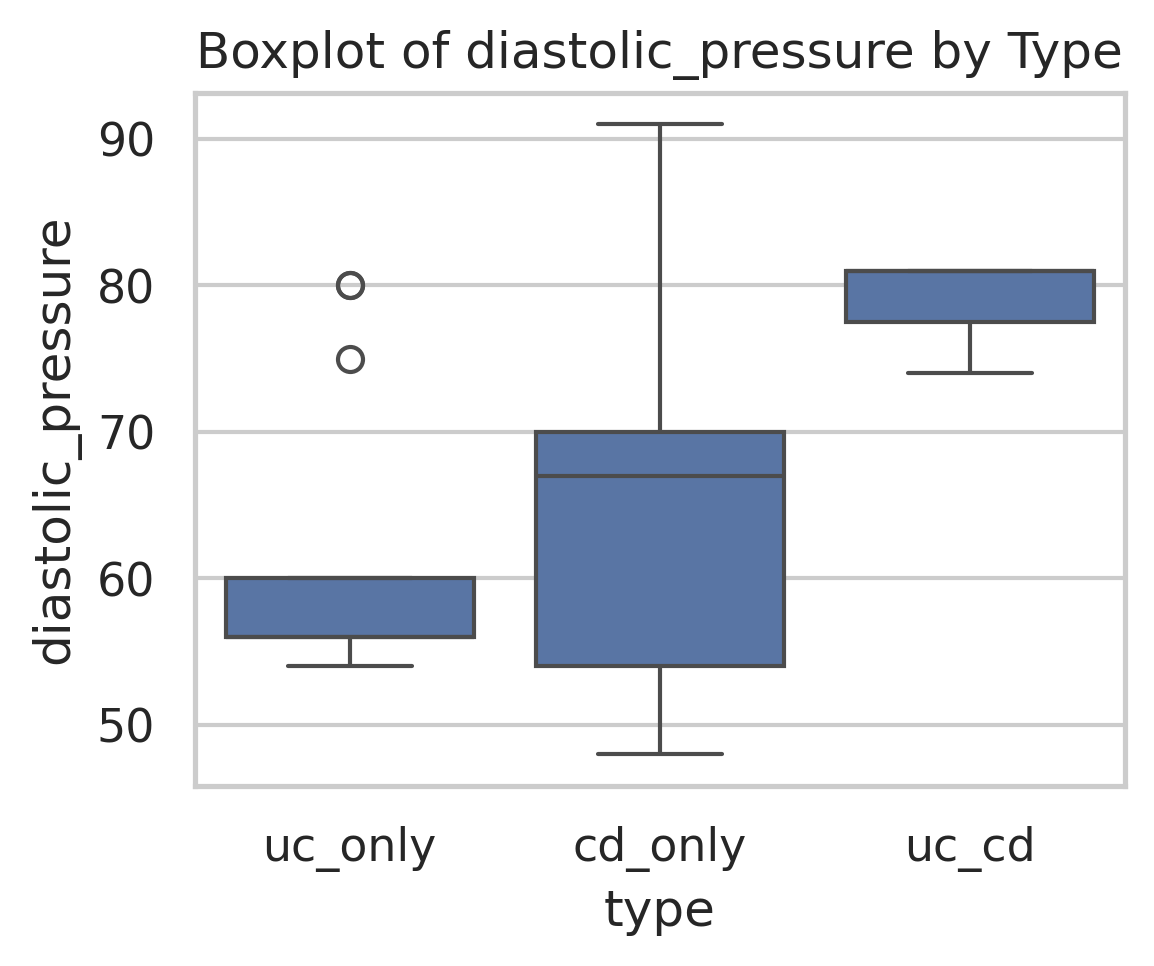

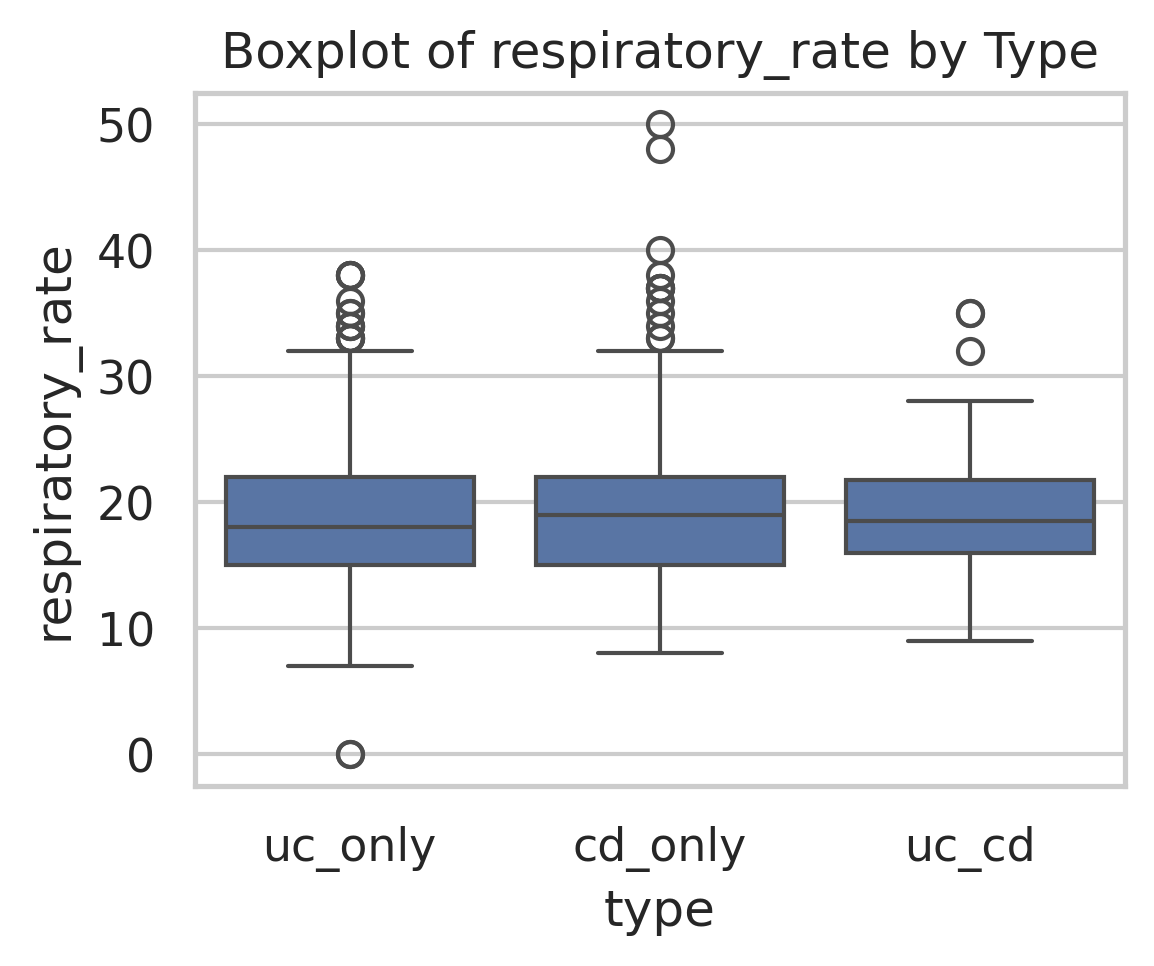

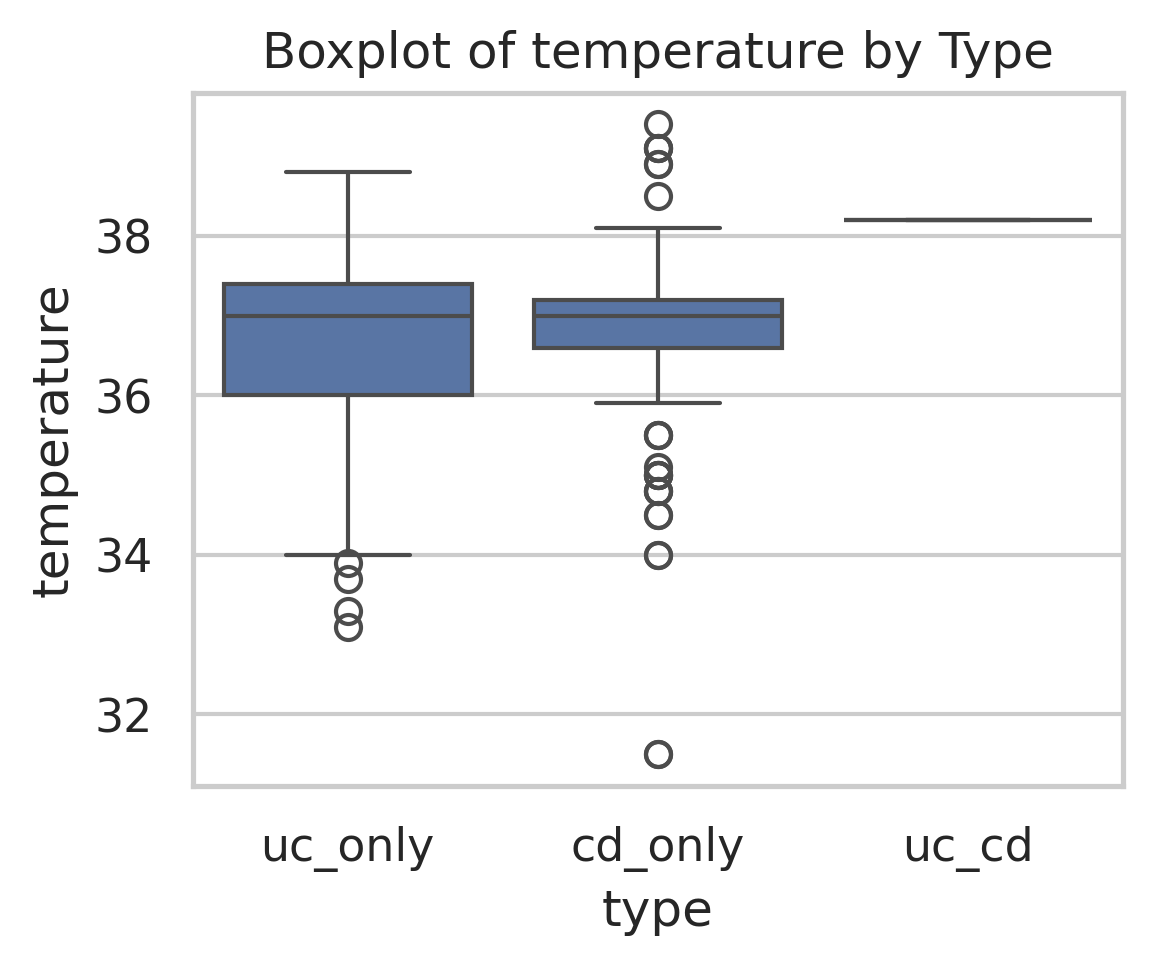

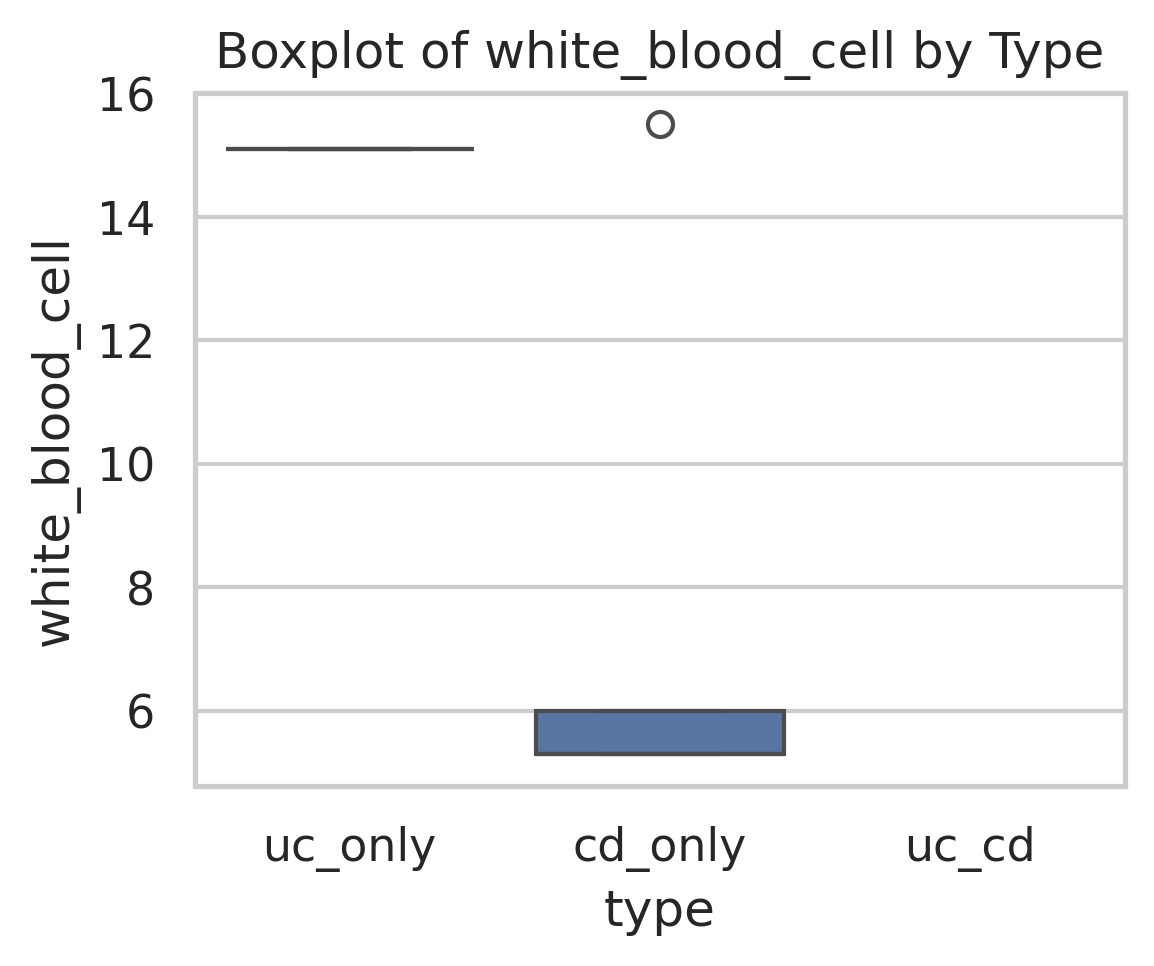

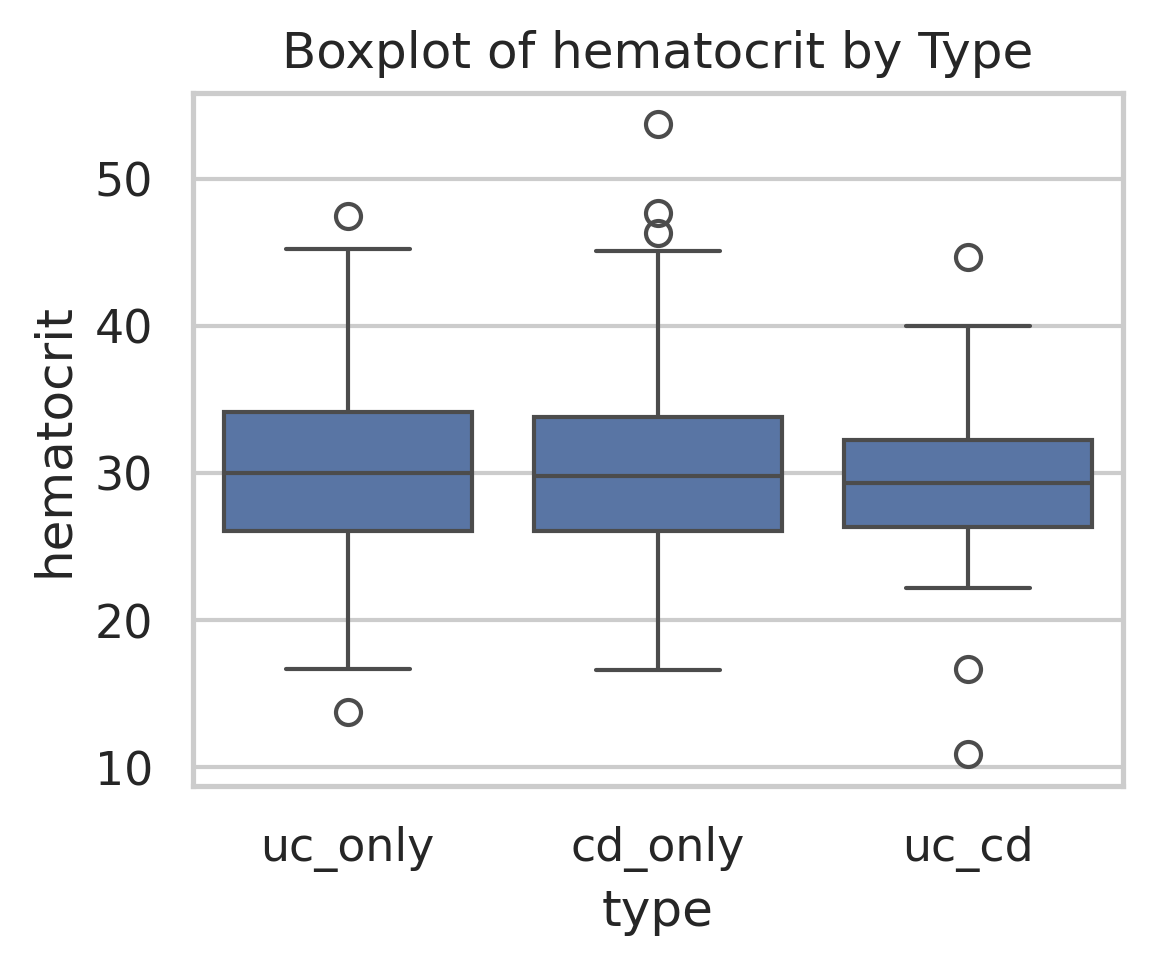

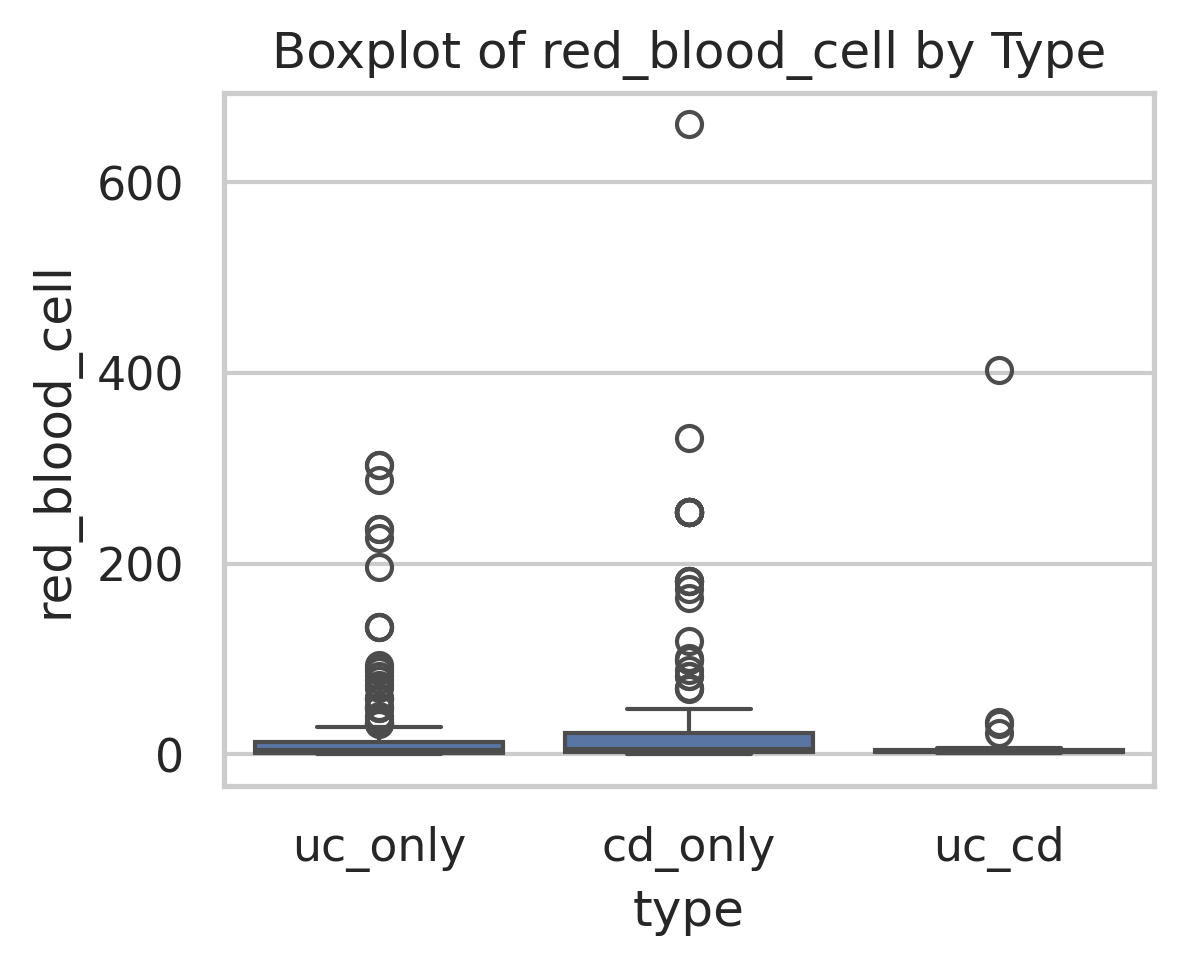

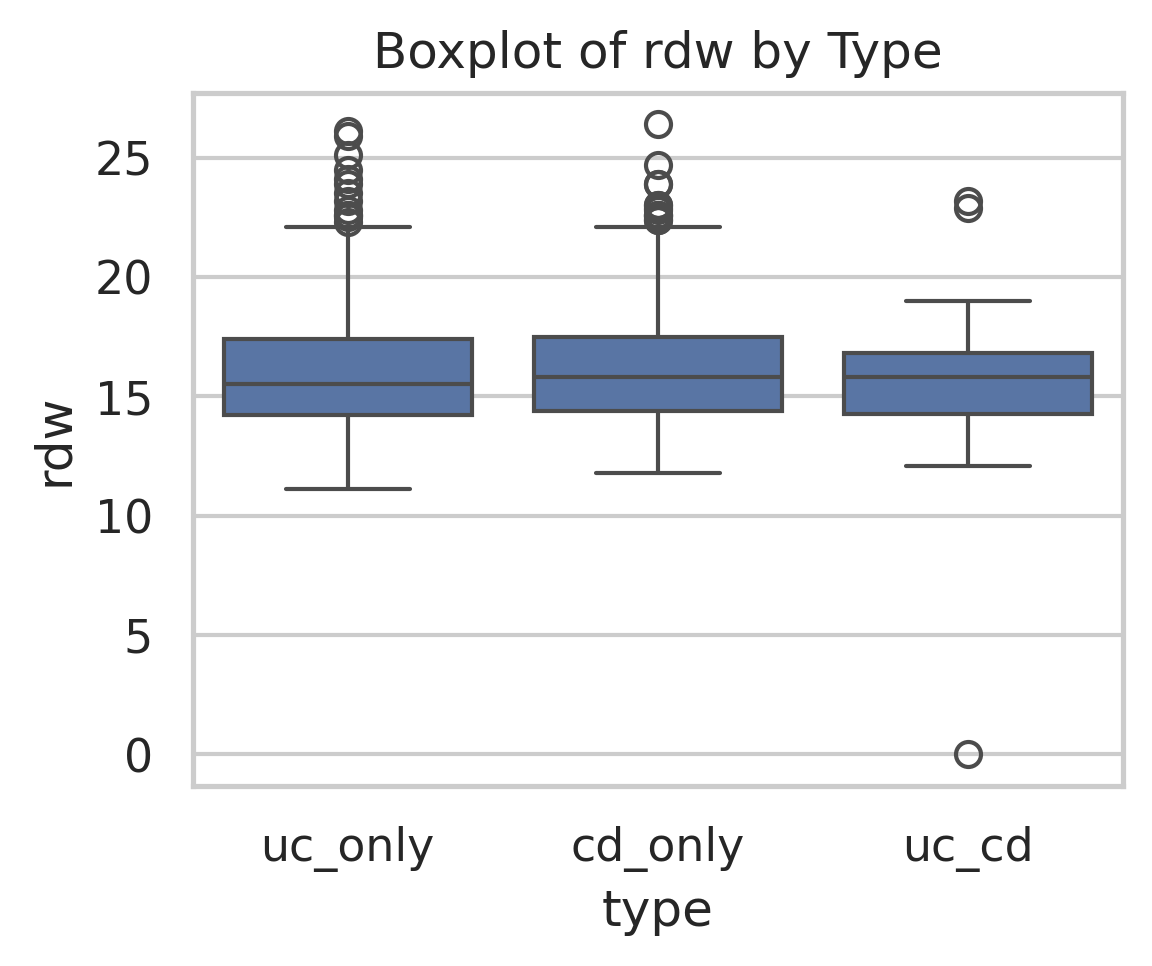

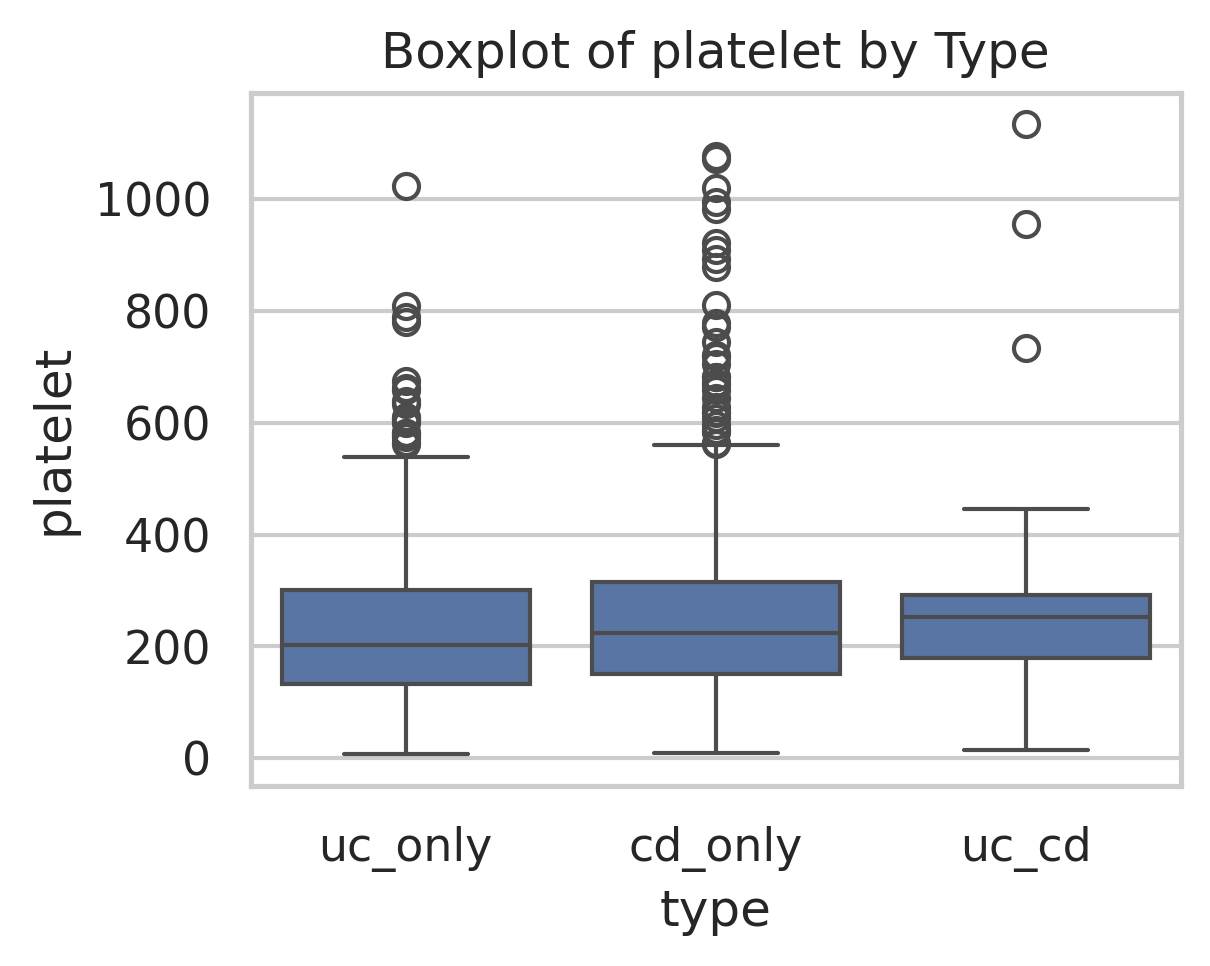

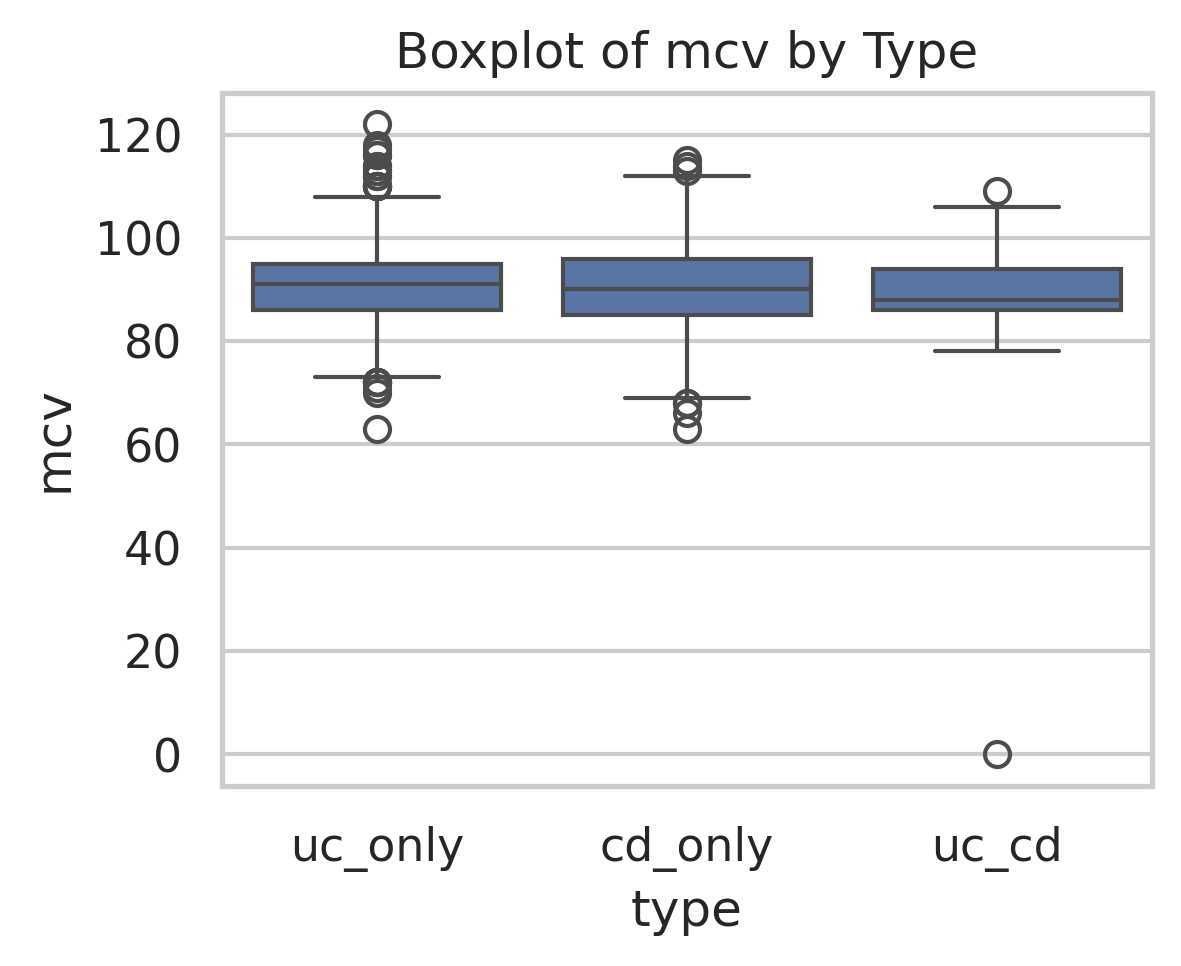

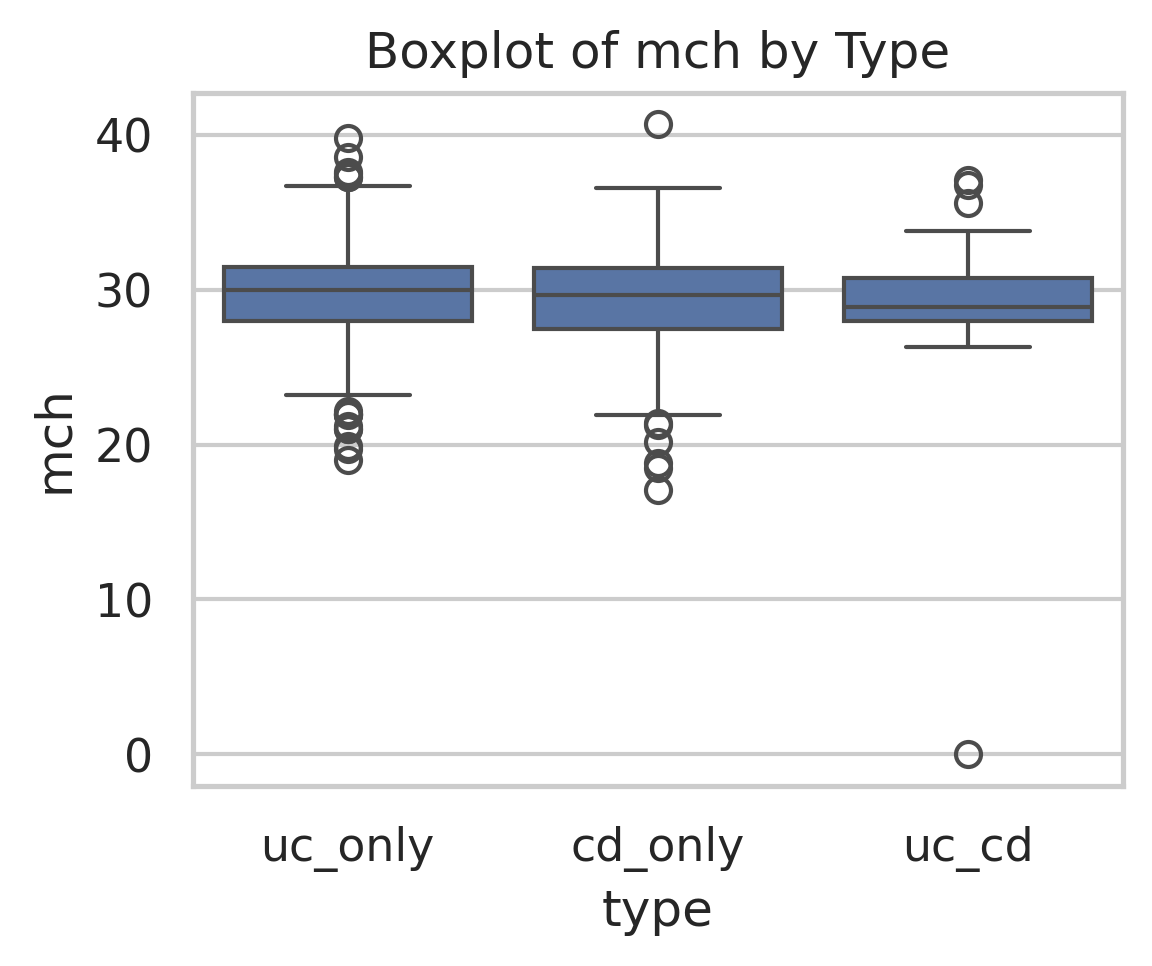

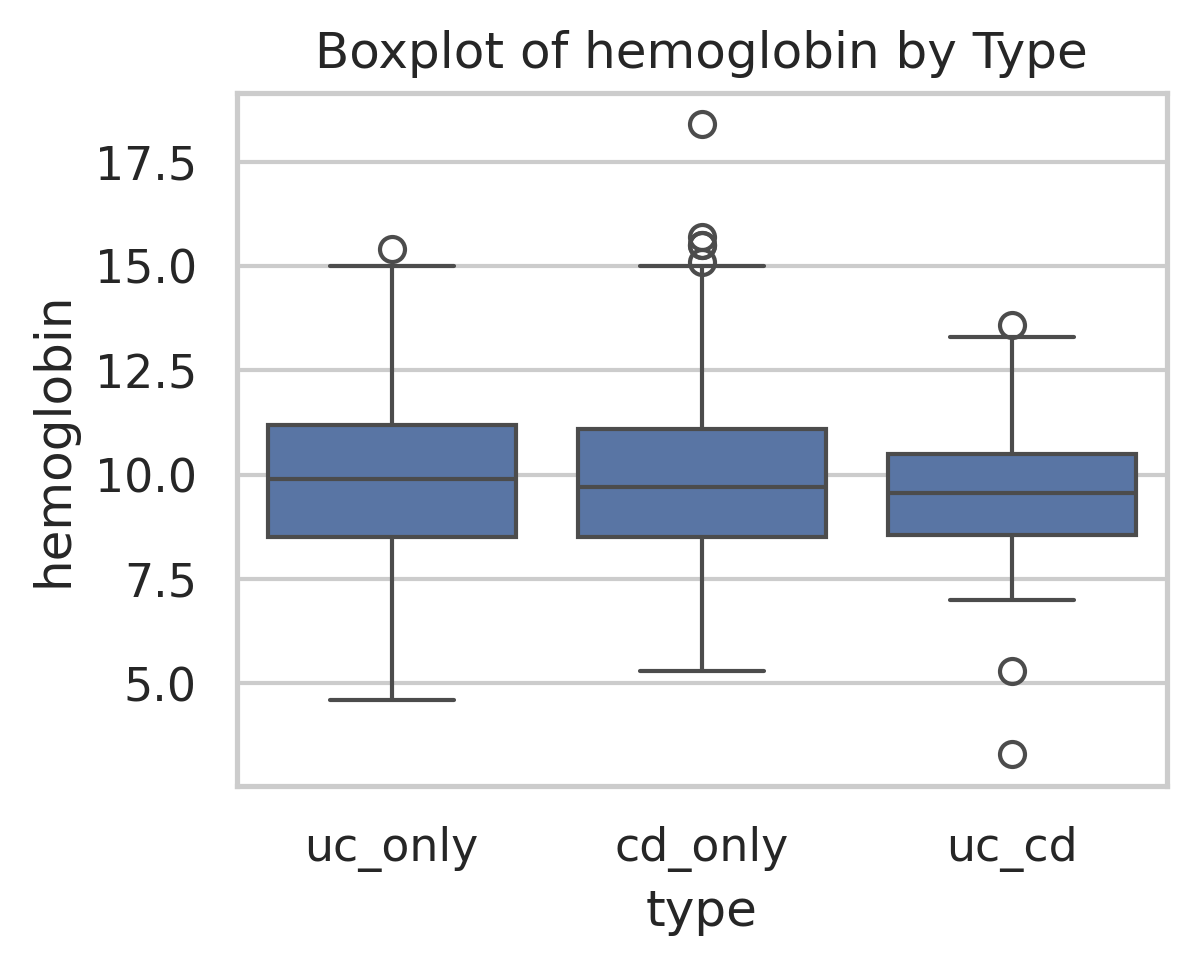

In [95]:
sns.set(style="whitegrid")

variables = ['age', 'weight', 'bmi', 'heart_rate', 'systolic_pressure',
       'diastolic_pressure', 'respiratory_rate', 'temperature',
       'white_blood_cell', 'hematocrit', 'red_blood_cell', 'rdw', 'platelet',
       'mcv', 'mch', 'hemoglobin']

for var in variables:
    plt.figure(figsize=(4, 3), dpi=300)  # 设置图形大小
    sns.boxplot(x='type', y=var, data=df)
    # plt.yscale('log')
    plt.title(f'Boxplot of {var} by Type')
    plt.show()

In [94]:
len(variables)

17

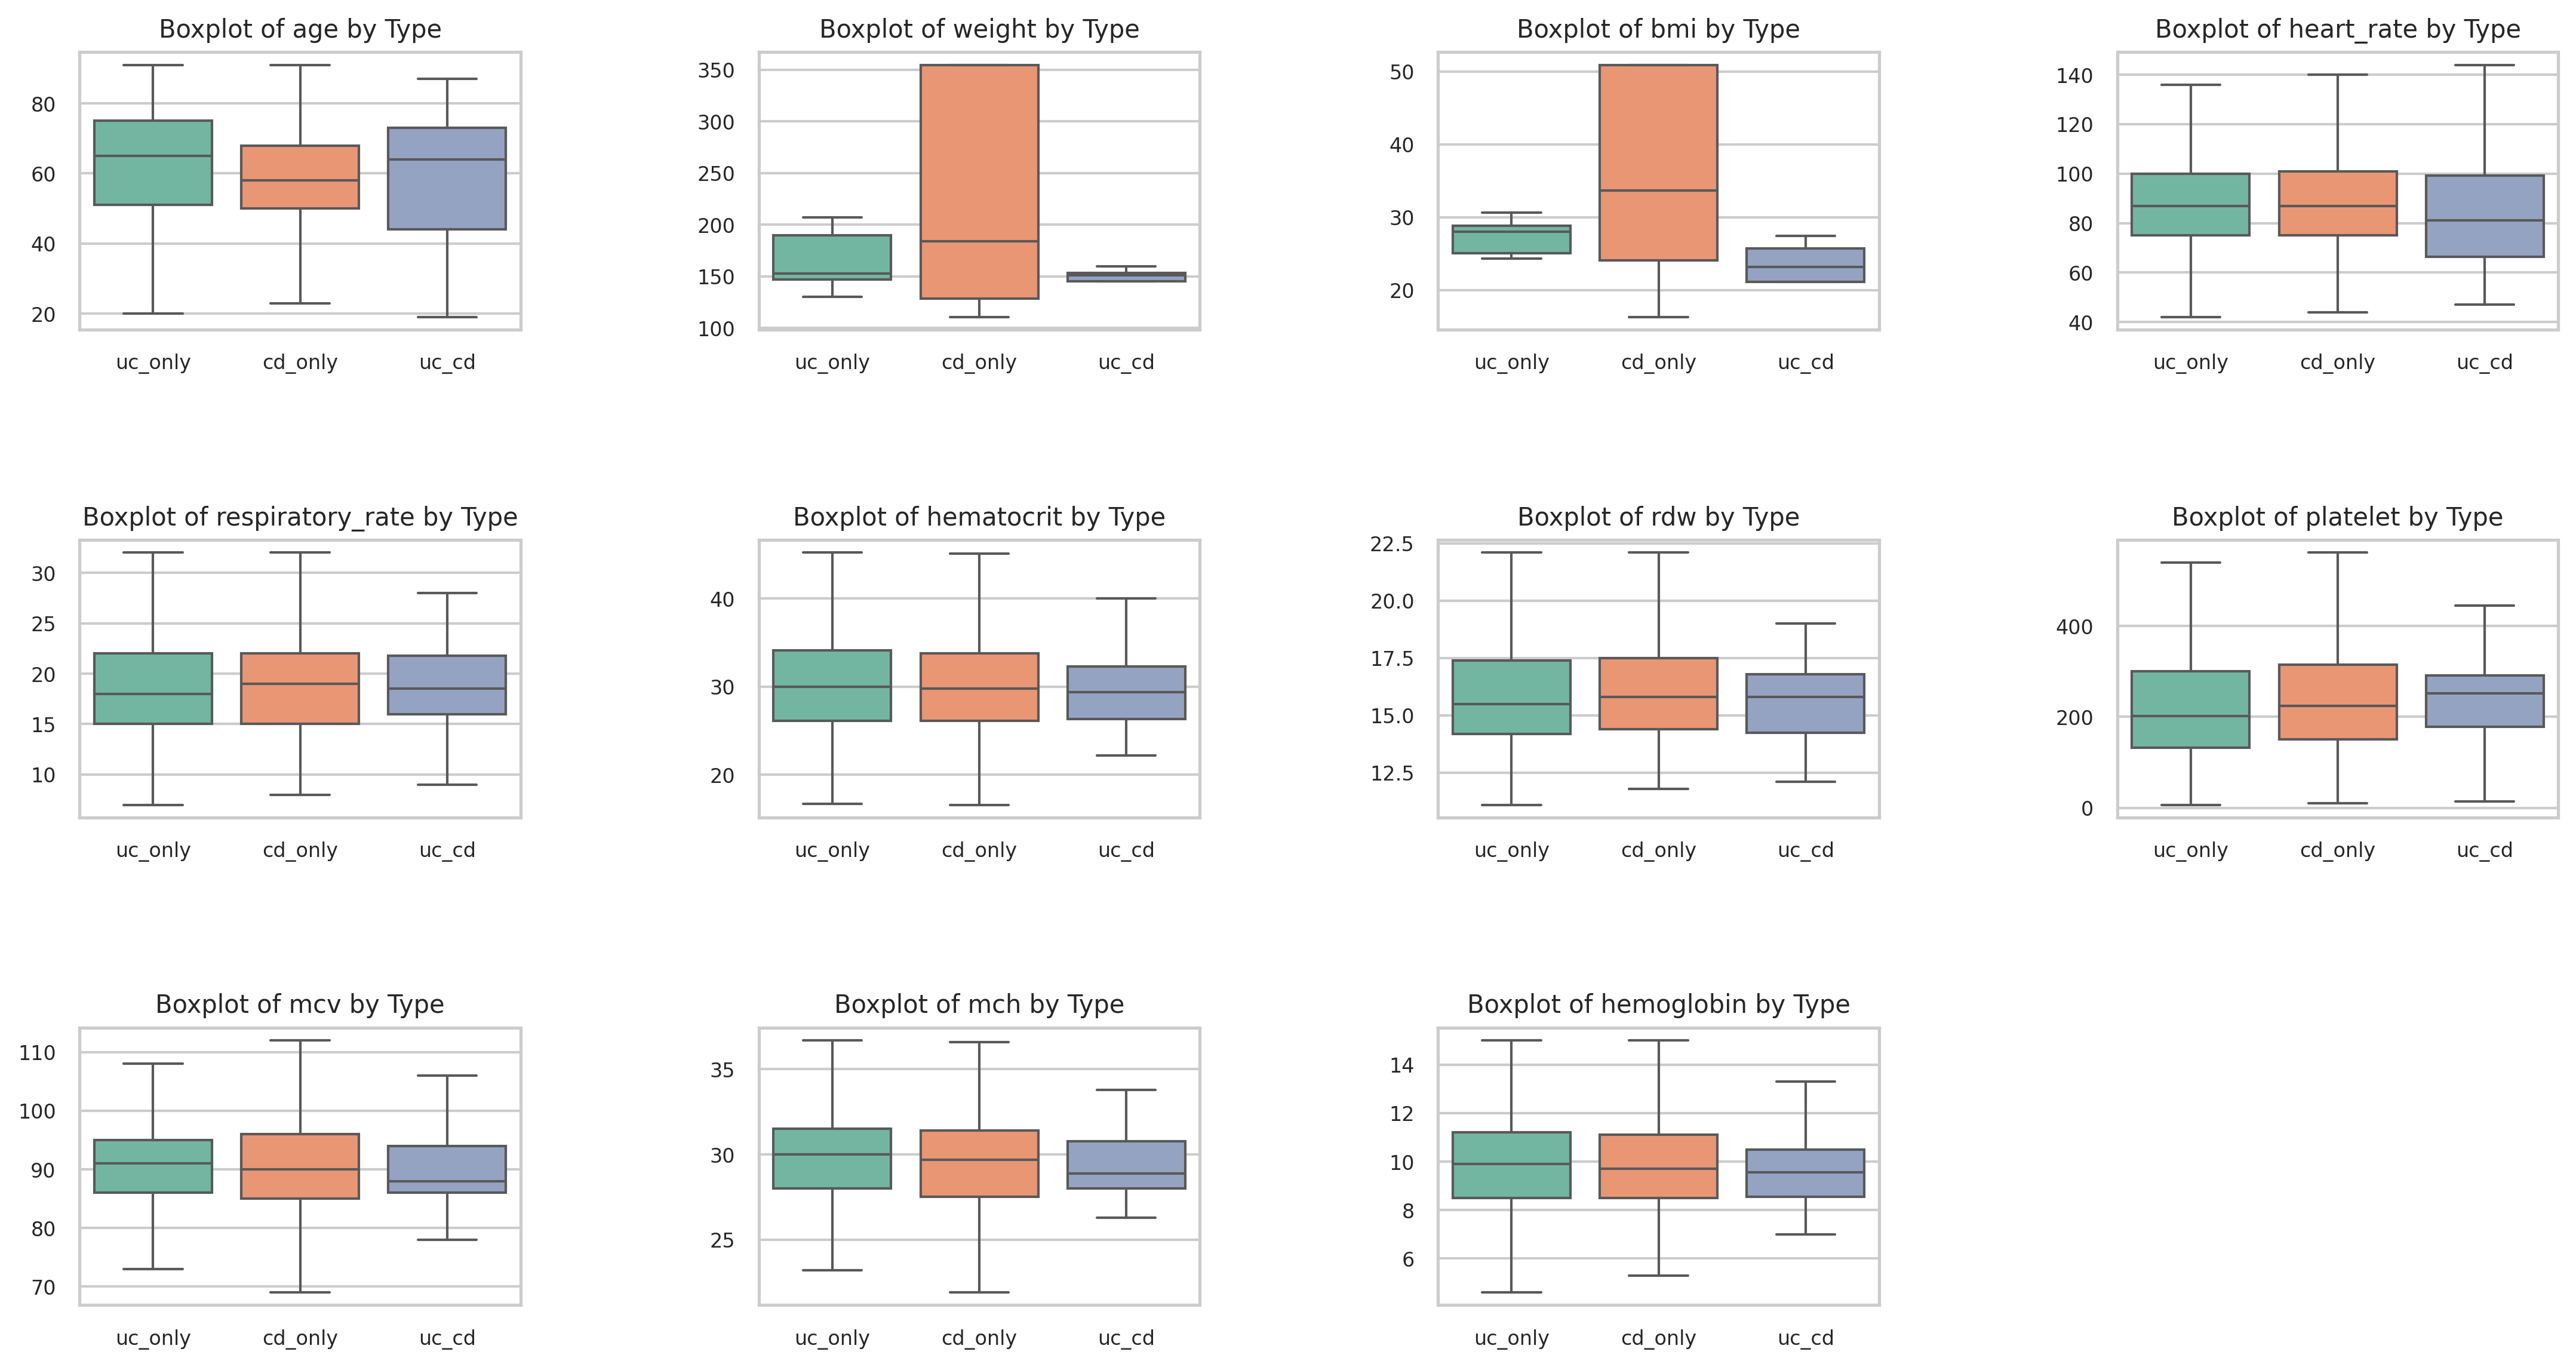

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置Seaborn的样式
sns.set(style="whitegrid")

# 定义变量
variables = ['age', 'weight', 'bmi', 'heart_rate', 'systolic_pressure',
             'diastolic_pressure', 'respiratory_rate', 'temperature',
             'white_blood_cell', 'hematocrit', 'red_blood_cell', 'rdw', 'platelet',
             'mcv', 'mch', 'hemoglobin']

col_except = ['systolic_pressure', 'diastolic_pressure', 'temperature', 'white_blood_cell', 'red_blood_cell']

# 创建一个4x4的图表网格
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 9), dpi=300)
fig.tight_layout(pad=5.0)

# 遍历变量和子图位置
for i, var in enumerate([col for col in variables if col not in col_except]):
    row, col = divmod(i, 4)
    ax = axes[row, col]
    # sns.boxplot(x='type', y=var, data=df, ax=ax, palette="Set2")  # 使用ax参数绘制到指定的子图
    sns.boxplot(x='type', y=var, hue='type', data=df, ax=ax, palette="Set2", legend=False, showfliers=False)  

    ax.set_title(f'Boxplot of {var} by Type', fontsize=10)
    ax.set_xlabel('')  # 清除x轴标签以节省空间
    ax.set_ylabel('')  # 清除y轴标签以节省空间
    ax.tick_params(axis='x', labelsize=8)  # 调整x轴标签大小
    ax.tick_params(axis='y', labelsize=8)  # 调整y轴标签大小


# 如果变量不是16的倍数，隐藏多余的子图
for j in range(i + 1, 12):
    row, col = divmod(j, 4)
    axes[row, col].axis('off')

plt.savefig('../img/obs.png')

In [118]:
for col in df.columns:
    print(col, end=' ')
    print(df[col].isna().sum())

hadm_id 0
subject_id 0
intime 0
outtime 0
los 0
mortality 0
gender 0
age 0
weight 1066
bmi 1070
heart_rate 1
systolic_pressure 1099
diastolic_pressure 1099
respiratory_rate 1
temperature 962
white_blood_cell 1155
hematocrit 18
red_blood_cell 705
rdw 17
platelet 18
mcv 17
mch 17
hemoglobin 16
CRP 1161
race 18
language 18
marital_status 32
insurance 18
die_in_icu 0
uc_only 0
cd_only 0
uc_cd 0
type 0


(1161, 33)